# Proyek Analisis Data: Bike Sharing
- **Nama:** Ferdy Elfanes
- **Email:** felfanes@gmail.com
- **ID Dicoding:** ferdyelfanes

## Menentukan Pertanyaan Bisnis

- Bagaimana segmentasi pengguna sepeda berdasarkan pola peminjaman?
- Bagaimana perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary?
- Bagaimana pengaruh cuaca dan musim terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [5]:
# Load dataset day.csv dan hour.csv
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Menampilkan 5 baris pertama dari kedua dataset
display(day_df.head(), hour_df.head())


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `day.csv` berisi data harian dari sewa sepeda, sedangkan `hour.csv` berisi data per jam dari sewa sepeda.
- Terdapat beberapa kategori seperti `season`, `weathersit`, `weekday` dan `workingday`.
- kolom `cnt` merupakan total jumlah penyewa sepeda dari pertambahan antara kolom `casual` dan `registered`



### Assessing Data

#### Menilai tabel `day_df`

In [6]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
day_df.duplicated().sum()

0

In [8]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


**Insight:**
- Tidak terdapat missing value dan duplikasi pada tabel `day_df`
- Kolom `dteday` masih dalam format string, oleh karena itu perlu dikonversi ke datetime

#### Menilai tabel `hour.csv`

In [9]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


**Insight:**
- Tidak terdapat missing value dan duplikasi pada tabel `hour_df`
- Kolom `dteday` masih dalam format string, oleh karena itu perlu dikonversi ke datetime

### Cleaning Data

In [12]:
# Mengubah format string ke datetime untuk kedua dataset
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

display(day_df.dtypes, hour_df.dtypes)

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


**Insight:**
- Format string pada kolom `dteday` sudah dikonversi ke datetime.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [13]:
# Melihat statistik deskriptif dari tabel day_df
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
# Melihat distribusi dari variabel categorical
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
  print(f"\n=== Distribusi {col} ===")
  print(day_df[col].value_counts().sort_index())


=== Distribusi season ===
season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

=== Distribusi yr ===
yr
0    365
1    366
Name: count, dtype: int64

=== Distribusi mnth ===
mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64

=== Distribusi holiday ===
holiday
0    710
1     21
Name: count, dtype: int64

=== Distribusi weekday ===
weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

=== Distribusi workingday ===
workingday
0    231
1    500
Name: count, dtype: int64

=== Distribusi weathersit ===
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


In [15]:
# Distribusi peminjaman berdasarkan hari dalam seminggu
weekday_trend = day_df.groupby('weekday')[["casual", "registered", "cnt"]].mean()
print(weekday_trend)

              casual   registered          cnt
weekday                                       
0        1338.295238  2890.533333  4228.828571
1         674.133333  3663.990476  4338.123810
2         556.182692  3954.480769  4510.663462
3         551.144231  3997.394231  4548.538462
4         590.961538  4076.298077  4667.259615
5         752.288462  3938.000000  4690.288462
6        1465.257143  3085.285714  4550.542857


**Insight:**
- Hari Senin - Jumat didominasi oleh penyewa yang sudah terdaftar atau `registered`
- Hari Sabtu dan Minggu, terdapat peningkatan untuk jumlah penyewa `casual` dibanding hari-hari lainnya

In [16]:
# Distribusi peminjaman berdasarkan bulan
monthly_trend = day_df.groupby('mnth')[["casual", "registered", "cnt"]].mean()
print(monthly_trend)

           casual   registered          cnt
mnth                                       
1      194.225806  1982.112903  2176.338710
2      262.508772  2392.789474  2655.298246
3      716.838710  2975.419355  3692.258065
4     1013.366667  3471.533333  4484.900000
5     1214.274194  4135.500000  5349.774194
6     1231.766667  4540.600000  5772.366667
7     1260.596774  4303.080645  5563.677419
8     1161.919355  4502.500000  5664.419355
9     1172.050000  4594.466667  5766.516667
10     963.870968  4235.354839  5199.225806
11     610.050000  3637.133333  4247.183333
12     349.887097  3053.919355  3403.806452


**Insight:**
- Secara keseluruhan berdasarkan kolom `mnth`, peminjaman meningkat dari bulan Maret - September lalu menurun setelahnya
- Puncak peminjaman terjadi pada bulan Juni - September
- Bulan Juni menjadi bulan dengan total peminjaman tertinggi
- Bulan Januari menjadi bulan dengan total peminjaman terendah

In [17]:
# Distribusi peminjaman berdasarkan musim
season_trend = day_df.groupby('season')[["casual", "registered", "cnt"]].mean()
print(season_trend)

             casual   registered          cnt
season                                       
1        334.928177  2269.204420  2604.132597
2       1106.097826  3886.233696  4992.331522
3       1202.611702  4441.691489  5644.303191
4        729.112360  3999.050562  4728.162921


**Insight:**
- Musim gugur (season=3) menjadi musim dengan total peminjaman tertinggi
- Musim dingin (season=1) menjadi musim dengan total peminjaman terendah

In [18]:
weather_trend = day_df.groupby('weathersit')[["casual", "registered", "cnt"]].mean()
print(weather_trend)

                casual   registered          cnt
weathersit                                      
1           964.030238  3912.755940  4876.786177
2           687.352227  3348.510121  4035.862348
3           185.476190  1617.809524  1803.285714


**Insight:**
- Cuaca cerah (weathersit=1) menjadi cuaca dengan total peminjaman tertinggi
- Cuaca buruk (weathersit=3) menjadi cuaca dengan total peminjaman terendah

In [19]:
# Analisis RFM
latest_date = day_df['dteday'].max()
rfm_df = day_df.copy()
rfm_df['Recency'] = (latest_date - rfm_df['dteday']).dt.days
rfm_df['Frequency'] = rfm_df.groupby('weekday')['cnt'].transform('count')
rfm_df['Monetary'] = rfm_df['cnt']
rfm_data = rfm_df.groupby('weekday')[["Recency", "Frequency", "Monetary"]].mean()
print(rfm_data)

         Recency  Frequency     Monetary
weekday                                 
0          365.0      105.0  4228.828571
1          364.0      105.0  4338.123810
2          366.5      104.0  4510.663462
3          365.5      104.0  4548.538462
4          364.5      104.0  4667.259615
5          363.5      104.0  4690.288462
6          366.0      105.0  4550.542857


**Insight:**
- Recency: Hampir sama untuk semua hari karena ini merupakan data agregat harian
- Frequency: Frekuensi lebih tinggi di akhir pekan
- Monetary: Hari dengan peminjaman tertinggi adalah Jumat dan Kamis

### Explore `hour_df`

In [20]:
# Melihat statistik deskriptif dari tabel hour_df
print(hour_df.describe())

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

In [21]:
# Distribusi berdasarkan jam dalam sehari
hourly_trend = hour_df.groupby('hr')[["casual", "registered", "cnt"]].mean()
print(hourly_trend)

       casual  registered         cnt
hr                                   
0   10.158402   43.739669   53.898072
1    6.504144   26.871547   33.375691
2    4.772028   18.097902   22.869930
3    2.715925    9.011478   11.727403
4    1.253945    5.098996    6.352941
5    1.411437   18.478382   19.889819
6    4.161379   71.882759   76.044138
7   11.055021  201.009629  212.064649
8   21.679505  337.331499  359.011004
9   30.891334  188.418157  219.309491
10  46.477304  127.191197  173.668501
11  59.540578  148.602476  208.143054
12  68.293956  185.021978  253.315934
13  72.308642  181.352538  253.661180
14  75.567901  165.381344  240.949246
15  74.905350  176.327846  251.233196
16  73.745205  238.238356  311.983562
17  74.273973  387.178082  461.452055
18  61.120879  364.390110  425.510989
19  48.770604  262.752747  311.523352
20  36.233516  189.796703  226.030220
21  28.255495  144.059066  172.314560
22  22.252747  109.082418  131.335165
23  15.199176   72.631868   87.831044


**Insight:**
- Puncak total peminjaman sepeda terjadi pada jam 17:00
- Penyewa `registered` meningkat drastis pada jam 07:00 - 08:00 dan 16:00 - 19:00
- Penyewa `casual` lebih banyak menyewa sepeda pada rentang jam 12:00 - 18:00
- Jam 00:00 - 05:00 merupakan waktu dengan total peminjaman terendah

In [22]:
# Distribusi peminjaman bedasarkan hari dalam seminggu (versi per jam)
weekday_trend_hourly = hour_df.groupby('weekday')[["casual", "registered", "cnt"]].mean()
print(weekday_trend_hourly)

            casual  registered         cnt
weekday                                   
0        56.163469  121.305356  177.468825
1        28.553449  155.191206  183.744655
2        23.580514  167.658377  191.238891
3        23.159192  167.971313  191.130505
4        24.872521  171.564144  196.436665
5        31.458786  164.677121  196.135907
6        61.246815  128.962978  190.209793


**Insight:**
- Hari Kamis menjadi hari dengan total peminjaman terbanyak
- Hari Minggu menjadi hari dengan total peminjaman paling sedikit

In [23]:
# Distribusi peminjaman berdasarkan kondisi cuaca (versi per jam)
weather_trend_hourly = hour_df.groupby('weathersit')[["casual", "registered", "cnt"]].mean()
print(weather_trend_hourly)

               casual  registered         cnt
weathersit                                   
1           40.545431  164.323841  204.869272
2           29.595290  145.570202  175.165493
3           16.055673   95.523608  111.579281
4            2.666667   71.666667   74.333333


**Insight:**
- Cuaca cerah menjadi cuaca dengan total peminjaman tertinggi
- Cuaca buruk menjadi cuaca dengan total peminjaman terendah

### Explore `merge_df`

In [24]:
# Menggabungkan dataset day_df dan hour_df berdasarkan 'dteday'
merge_df = hour_df.merge(day_df, on='dteday', suffixes=('_hour', '_day'))
merge_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [25]:
# Menampilkan informasi dataset gabungan
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [26]:
# Melihat korelasi antara peminjaman per jam dengan variabel lainnya
correlation_matrix_merged = merge_df.corr(numeric_only=True)
correlation_with_cnt_hour = correlation_matrix_merged['cnt_hour'].sort_values(ascending=False)

print(correlation_with_cnt_hour)

cnt_hour           1.000000
registered_hour    0.972151
casual_hour        0.694564
cnt_day            0.437289
registered_day     0.412720
temp_hour          0.404772
atemp_hour         0.400929
hr                 0.394071
casual_day         0.292866
instant_hour       0.278379
instant_day        0.277753
atemp_day          0.274911
temp_day           0.273276
yr_day             0.250495
yr_hour            0.250495
season_day         0.178056
season_hour        0.178056
mnth_hour          0.120638
mnth_day           0.120638
windspeed_hour     0.093234
workingday_day     0.030284
workingday_hour    0.030284
weekday_day        0.026900
weekday_hour       0.026900
holiday_day       -0.030927
holiday_hour      -0.030927
hum_day           -0.040465
windspeed_day     -0.100367
weathersit_day    -0.127413
weathersit_hour   -0.142426
hum_hour          -0.322911
Name: cnt_hour, dtype: float64


**Insight:**
- Jumlah peminjaman per jam atau `cnt_hour` sangat berkorelasi dengan penyewa terdaftar atau `registered_hour` yang mana mayoritas peminjaman berasal dari pelanggan tetap.
- Suhu `temp_hour` memiliki korelasi positif dengan jumlah peminjaman. semakin hangat suhu semakin banyak orang menyewa sepeda. Tetapi ketika suhu terlalu panas atau dingin, peminjaman cenderung menurun.
- Jam `hr` menunjukkan tren yang sangat khas dengan `cnt_hour`, dengan jam sibuk pagi dan sore
- `merge_df` menunjukkan bahwa musim dan cuaca tetap memengaruhi pola per jam

In [27]:
# Melihat korelasi antara 'casual_hour' dan 'registered_hour' versi per jam
correlation_casual_registered = merge_df["casual_hour"].corr(merge_df["registered_hour"])
print(correlation_casual_registered)

0.5066177004294634


**Insight:**
- Korelasi `0.51` menunjukkan hubungan sedang antara penyewa `casual_hour` dan `registered_hour`
- Hal ini berarti memperlihatkan bahwa ada jam tertentu di mana kedua kelompok menyewa sepeda bersama-sama, ada juga saat di mana hanya satu kelompok saja yang dominan

In [28]:
# Melihat korelasi antara `temp_hour` dan 'hum_hour` versi per jam
correlation_temp_humidity = merge_df["temp_hour"].corr(merge_df["hum_hour"])
print(correlation_temp_humidity)

-0.06988139105119354


**Insight:**
- Korelasi `0.07` menunjukkan hampir tidak ada hubungan antara suhu `temp_hour` dan kelembaban `hum_hour`
- Hal ini berarti bahwa kelembaban udara tidak terlalu dipengaruhi oleh suhu, yang mana kelembaban bisa tinggi atau rendah tanpa bergantung pada suhu yang hangat atau dingin

In [29]:
# Melihat korelasi antara `workingday_hour` dan `hr` versi per jam
correlation_workingday_hr = merge_df["workingday_hour"].corr(merge_df["hr"])
print(correlation_workingday_hr)

0.0022849981041432777


**Insight:**
- Korelasi `0.002` berarti tidak ada hubungan antara jam `hr` dan apakah hari tersebut adalah hari kerja `workingday_hour`
- Ini berarti bahwa pola peminjaman berdasarkan jam tidak berubah secara signifikan antara hari kerja dan akhir pekan

In [30]:
# Melihat distribusi peminjaman berdasarkan cuaca dalam per jam
pivot_weather = merge_df.pivot_table(values='cnt_hour', index='hr', columns='weathersit_day', aggfunc='mean')
print(pivot_weather)

weathersit_day           1           2           3
hr                                                
0                56.321739   51.367347   30.333333
1                34.963043   31.522449   18.842105
2                23.580574   22.316872   13.000000
3                12.397291   10.772152    7.588235
4                 6.485459    6.193966    5.111111
5                20.887912   18.640496   12.300000
6                79.991304   70.889796   48.400000
7               226.363636  193.836735  105.050000
8               377.824675  338.175510  179.650000
9               229.987013  207.579592  116.350000
10              187.285714  156.118367   74.100000
11              226.290043  184.342857   80.500000
12              276.764069  222.495935   90.750000
13              278.038961  221.639676   86.000000
14              264.538961  209.400810   85.650000
15              274.413420  221.178138   86.950000
16              339.969762  276.016194  108.300000
17              498.017279  415

**Insight:**
- Saat cuaca cerah `weathersit_day=1`, jumlah peminjaman lebih tinggi dibanding saat cuaca buruk
- Puncak peminjaman terjadi pada jam 08:00 dan 17:00 di semua kondisi cuaca, tetapi jauh lebih rendah saat cuaca buruk `weathersit_day=3`
- Pada dini hari yaitu jam 00:00 - 05:00, jumlah peminjaman tetap rendah di semua kondisi cuaca
- Perbedaan jumlah peminjaman terbesar terjadi di jam sibuk yaitu 07:00 - 19:00, di mana cuaca buruk `weathersit_day=3` sangat menurunkan jumlah peminjaman

In [31]:
# Melihat distribusi pola peminjaman berdasarkan hari dalam seminggu dan jam
pivot_weekday_hour = merge_df.pivot_table(values='cnt_hour', index='hr', columns='weekday_day', aggfunc='mean')
print(pivot_weekday_hour)

weekday_day           0           1           2           3           4  \
hr                                                                        
0             93.990385   34.009524   27.623762   34.557692   39.271845   
1             77.432692   17.307692   12.540000   15.336538   17.223301   
2             61.627451   10.313131    6.801980    7.813725    9.156863   
3             31.144231    5.113402    4.152174    4.888889    5.071429   
4              9.362745    5.785714    5.131313    4.968750    5.280000   
5              8.693878   21.653846   24.455446   25.750000   25.912621   
6             14.495146   85.865385  106.500000  107.807692  107.436893   
7             33.104762  248.538462  299.696078  303.980769  304.737864   
8             83.857143  412.192308  471.784314  488.326923  488.572816   
9            156.542857  218.442308  236.450980  238.528846  240.873786   
10           258.580952  139.028846  129.225490  131.894231  132.563107   
11           315.380952  

**Insight:**
- Hari kerja `weekday_day=1-5` memiliki puncak peminjaman yang tinggi pada jam 07:00 - 09:00 dan 17:00 - 19:00
- Akhir pekan `weekday_day=0 dan 6` memiliki pola peminjaman yang lebih merata sepanjang hari

In [32]:
# Melihat perbandingan peminjaman antara hari libur dan hari kerja
pivot_holiday_hour = merge_df.pivot_table(values='cnt_hour', index='hr', columns='holiday_day', aggfunc='mean')
print(pivot_holiday_hour)

holiday_day           0           1
hr                                 
0             53.791489   57.476190
1             33.210526   38.904762
2             22.791066   25.476190
3             11.730486   11.611111
4              6.367799    5.850000
5             20.169540   10.619048
6             77.468750   28.285714
7            215.929178   82.142857
8            364.617564  170.523810
9            220.740793  171.190476
10           172.781870  203.476190
11           206.941926  248.523810
12           252.311174  287.142857
13           252.330508  298.523810
14           239.604520  286.285714
15           250.820621  265.142857
16           313.159379  272.285714
17           466.437236  293.142857
18           430.166902  268.761905
19           314.189533  221.761905
20           227.458274  177.952381
21           173.123055  145.095238
22           132.002829  108.857143
23            88.719943   57.904762


**Insight:**
- Jumlah peminjaman di hari libur lebih rendah dibanding hari kerja, terutama pada jam sibuk
- Hari kerja memiliki lonjakan signifikan pada jam 07:00 - 09:00 dan 17:00 - 19:00, sedangkan hari libur lebih stabil di sepanjang hari
- Jumlah peminjaman tertinggi di hari libur terjadi pada siang hari yaitu pada jam 12:00 - 16:00

In [33]:
# Melihat pengaruh musim terhadap peminjaman di berbagai jam
pivot_season_hour = merge_df.pivot_table(values='cnt_hour', index='hr', columns='season_day', aggfunc='mean')
print(pivot_season_hour)

season_day           1           2           3           4
hr                                                        
0            27.404494   56.842391   73.914439   56.333333
1            18.140449   35.222826   43.720430   35.920455
2            12.794118   23.380435   30.731183   23.765714
3             7.102564   11.450549   15.752688   11.861272
4             3.181818    6.211111    8.240642    7.267045
5            10.701754   19.169399   26.454545   22.590909
6            40.792135   79.070652  101.315508   81.681818
7           115.391061  221.483696  276.595745  231.607955
8           235.167598  380.135870  421.297872  396.346591
9           147.016760  233.983696  254.930851  239.443182
10          100.217877  189.777174  214.920213  187.465909
11          120.530726  231.440217  251.696809  226.369318
12          150.727778  278.543478  300.308511  281.664773
13          156.527778  282.728261  296.042553  277.209040
14          147.805556  265.777174  282.234043  266.0112

**Insight:**
- Musim gugur `season_day=3` memiliki jumlah peminjaman tertinggi di hampir semua jam
- Musim dingin `season_day=1` memiliki jumlah peminjaman terendah di tiap jam nya
- Musim panas `season_day=2` dan musim semi `season_day=4` memiliki jumlah peminjaman yang cukup tinggi, namun sedikit lebih rendah dibanding musim gugur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana segmentasi pengguna berdasarkan pola peminjaman?

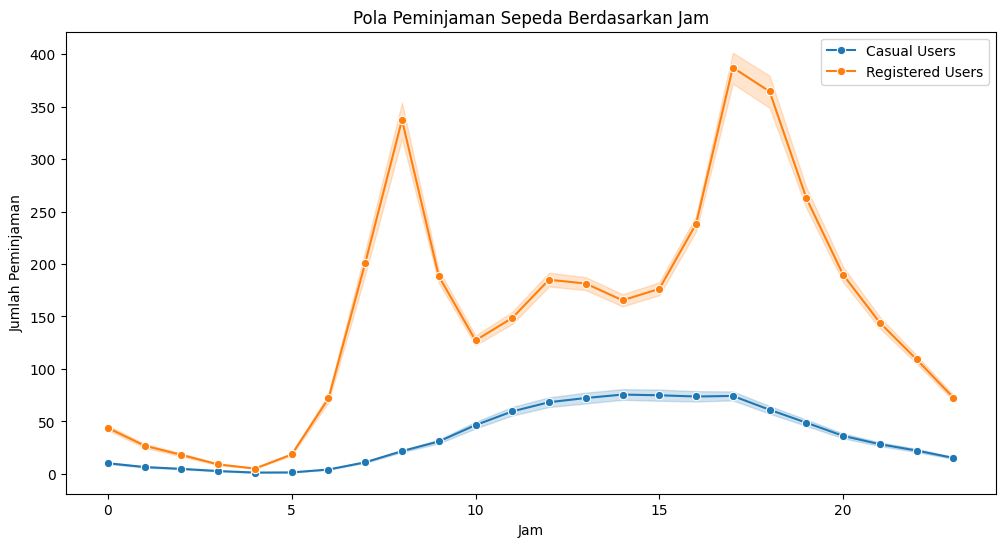

In [34]:
# Plot jumlah peminjaman casual vs registered berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x="hr", y="casual", label="Casual Users", marker="o")
sns.lineplot(data=hour_df, x="hr", y="registered", label="Registered Users", marker="o")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.legend()
plt.show()

**Insight:**
- Terdapat 2 puncak peminjaman sepeda yang sangat jelas, yaitu pada pagi hari sekitar pukul `08:00` dan sore hari sekitar pukul `17:00 - 18:00`, yang mana pola ini mengindikasikan bahwa banyak pengguna sepeda menggunakan layanan untuk perjalanan berangkat dan pulang kerja/sekolah
- Aktivitas peminjaman sepeda lebih rendah pada tengah malam hingga dini hari, yang dapat diasumsikan sebagai waktu istirahat

### Pertanyaan 2: Bagaimana perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary?

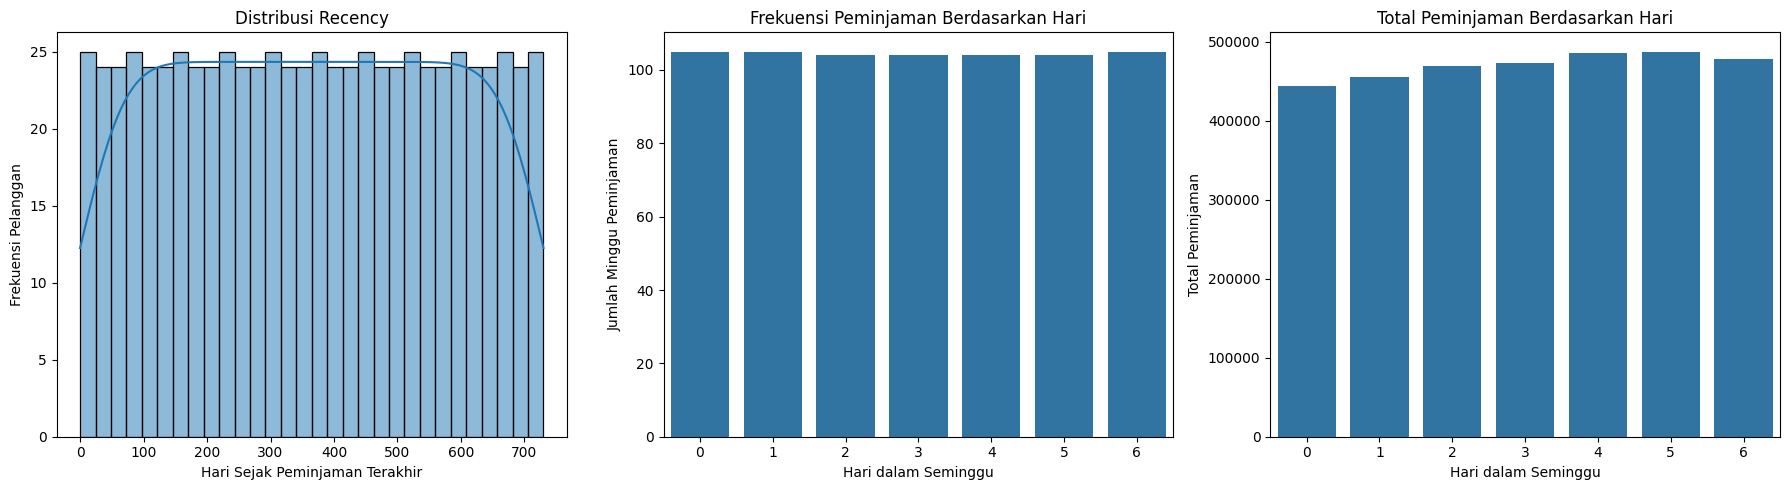

In [35]:
# Konfigurasi ukuran visualisasi
fig, ax = plt.subplots(1, 3, figsize=(18, 5))


color = "#1f77b4"

# Histogram Recency
recency_days = (day_df["dteday"].max() - day_df["dteday"]).dt.days
sns.histplot(recency_days, bins=30, kde=True, color=color, ax=ax[0])
ax[0].set_title("Distribusi Recency")
ax[0].set_xlabel("Hari Sejak Peminjaman Terakhir")
ax[0].set_ylabel("Frekuensi Pelanggan")

# Barplot Frequency (Jumlah Hari Peminjaman Per Kelompok)
frequency_data = day_df.groupby("weekday")["dteday"].count().reset_index()
sns.barplot(x="weekday", y="dteday", data=frequency_data, color=color, ax=ax[1])
ax[1].set_title("Frekuensi Peminjaman Berdasarkan Hari")
ax[1].set_xlabel("Hari dalam Seminggu")
ax[1].set_ylabel("Jumlah Minggu Peminjaman")

# Barplot Monetary (Total Jumlah Peminjaman)
monetary_data = day_df.groupby("weekday")["cnt"].sum().reset_index()
sns.barplot(x="weekday", y="cnt", data=monetary_data, color=color, ax=ax[2])
ax[2].set_title("Total Peminjaman Berdasarkan Hari")
ax[2].set_xlabel("Hari dalam Seminggu")
ax[2].set_ylabel("Total Peminjaman")

plt.tight_layout()
plt.show()

**Insight:**
- `Recency` menunjukkan distribusi yang cukup merata untuk persebaran pelanggan.
- `Frequency` memperlihatkan bahwa mayoritas pelanggan memiliki jumlah hari peminjaman yang relatif seragam setiap minggunya
- `Monetary` menunjukkan bahwa total peminjaman dalam setiap harinya relatif tinggi dengan puncak tertingginya pada hari Kamis dan Jumat

### Pertanyaan 3: Bagaimana pengaruh cuaca dan musim terhadap jumlah peminjaman sepeda?

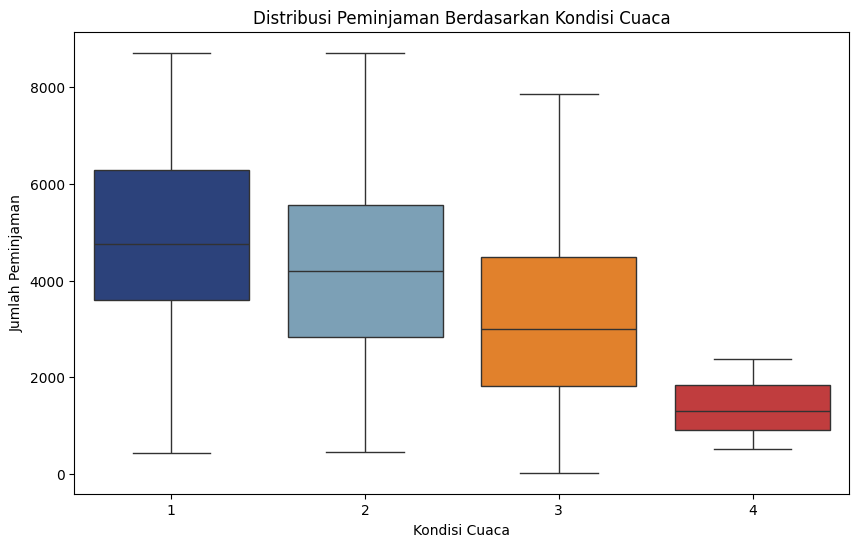

In [40]:
# Boxplot jumlah peminjaman berdasarkan kondisi cuaca

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="weathersit_hour", y="cnt_day", data=merge_df,
    hue="weathersit_hour", palette=["#1f3c88", "#72a2c0", "#ff7f0e", "#d62728"], legend=False
)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Distribusi Peminjaman Berdasarkan Kondisi Cuaca")
plt.show()

**Insight:**
- Kondisi cuaca yang lebih cerah `kategori 1 dan 2` menunjukkan jumlah lebih tinggi dibandingkan cuaca buruk `kategori 3`
- Hal ini menunjukkan bahwa cuaca sangat memengaruhi keputusan pelangggan dalam menggunakan layanan sepeda
- Pada kondisi cuaca yang lebih buruk, jumlah peminjaman cenderung menurun secara signifikan

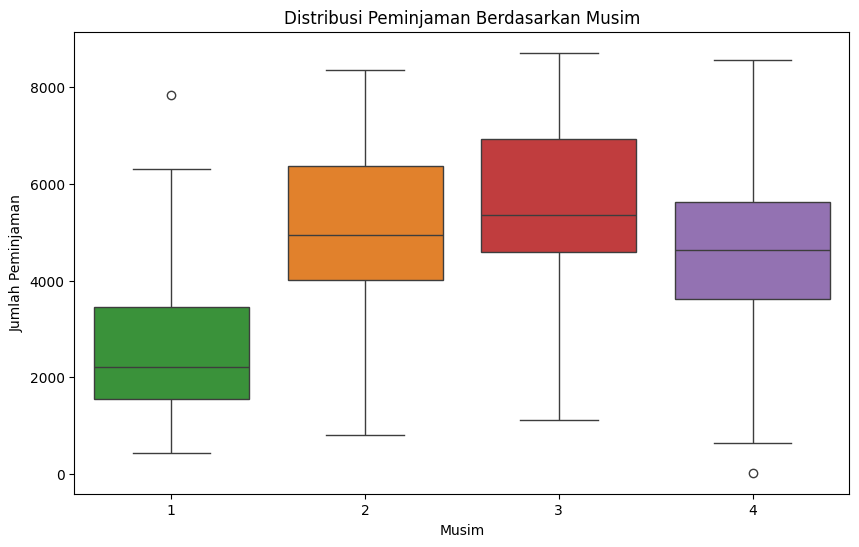

In [37]:
# Boxplot jumlah peminjaman berdasarkan musim

plt.figure(figsize=(10, 6))
sns.boxplot(x="season", y="cnt", data=day_df, hue="season",palette=["#2ca02c", "#ff7f0e", "#d62728", "#9467bd"], legend=False)
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.title("Distribusi Peminjaman Berdasarkan Musim")
plt.show()

**Insight:**
- Musim semi dan panas `kategori 2 dan 3` menunjukkan jumlah peminjaman tertinggi dibandingkan musim lainnya
- Hal ini menunjukkan bahwa cuaca sangat memengaruhi keputusan pelanggan dalam menggunakan layanan sepeda
- pada kondisi cuaca yang lebih buruk, jumlah peminjaman cenderung menurun secara signifikan

### Pertanyaan 4: Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?

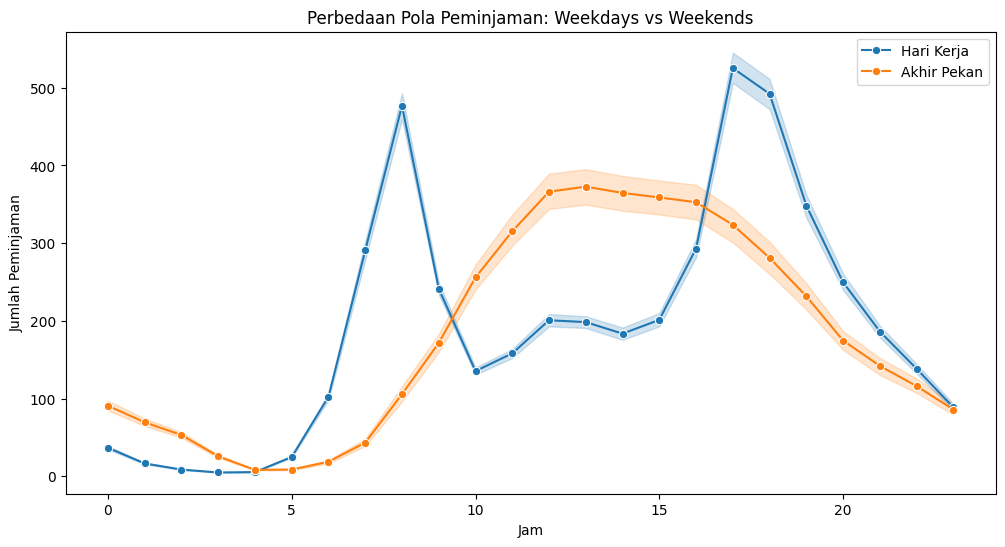

In [41]:
# Lineplot perbandingan Weekdays dan Weekends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df[hour_df["workingday"] == 1], x="hr", y="cnt", label="Hari Kerja", marker="o")
sns.lineplot(data=hour_df[hour_df["workingday"] == 0], x="hr", y="cnt", label="Akhir Pekan", marker="o")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.title("Perbedaan Pola Peminjaman: Weekdays vs Weekends")
plt.legend()
plt.show()

**Insight:**
- `Weekdays` memiliki dua puncak yaitu jam 08:00 dan 17:00, yang mengindikasikan penggunaan sepeda sebagai transportasi ke kantor atau sekolah
- `Weekends` memiliki pola yang lebih merata, dengan puncak lebih landai di siang hingga sore hari.

## Conclusion

### Conclusion pertanyaan 1: Bagaimana segmentasi pengguna berdasarkan pola peminjaman?

#### `Registered Users`:
- Peminjaman terjadi secara rutin dan cenderung mengikuti pola transportasi harian.
- Terdapat dua puncak peminjaman yang jelas pada hari kerja, yaitu pagi sekitar pukul 08:00 dan sore sekitar pukul 17:00-18:00.
- Aktivitas peminjaman lebih rendah di akhir pekan dibandingkan hari kerja.

#### `Casual Users`:
-	Pola peminjaman lebih fleksibel dan tersebar sepanjang hari.
- Puncak peminjaman terjadi pada siang hingga sore hari, terutama saat akhir pekan.
- Kemungkinan besar menggunakan sepeda untuk rekreasi atau aktivitas santai daripada transportasi rutin.

Kesimpulannya, `registered users` cenderung menggunakan layanan untuk kebutuhan transportasi reguler, sementara `casual users` lebih banyak menggunakan sepeda untuk tujuan rekreasi.

### Conclusion pertanyaan 2: Bagaimana perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary?

#### `Recency`:
- Distribusi tampak cukup merata, menunjukkan bahwa pelanggan memiliki pola peminjaman yang bervariasi terkait kapan terakhir kali mereka menggunakan layanan.

#### `Frequency & Monetary`:
- Sebagian besar pelanggan memiliki jumlah hari peminjaman yang cukup tinggi dan konsisten dalam seminggu.
- Pelanggan yang lebih sering menggunakan sepeda juga memiliki total peminjaman `monetary` yang lebih tinggi.

### Conclusion pertanyaan 3: Bagaimana pengaruh cuaca dan musim terhadap jumlah peminjaman sepeda?

#### `Cuaca`:
-	Saat kondisi cuaca lebih cerah `kategori 1 & 2`, jumlah peminjaman cenderung lebih tinggi.
-	Pada cuaca yang kurang mendukung `kategori 3`, jumlah peminjaman mengalami penurunan yang cukup signifikan.
-	Ini menunjukkan bahwa cuaca memiliki dampak langsung terhadap keputusan pelanggan dalam menggunakan layanan.

####	`Musim`:
- Peminjaman tertinggi terjadi pada musim semi dan panas `kategori 2 & 3`, yang kemungkinan besar disebabkan oleh kondisi cuaca yang lebih nyaman untuk bersepeda.
-	Pada musim dingin `kategori 1`, jumlah peminjaman jauh lebih rendah, kemungkinan karena suhu yang lebih dingin dan kondisi jalan yang kurang mendukung.

Kesimpulannya, baik cuaca maupun musim memiliki peran penting dalam menentukan jumlah peminjaman sepeda

### Conclusion pertanyaan 4: Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?

#### `Weekdays`:
- Pola peminjaman didominasi oleh pelanggan terdaftar, dengan dua puncak utama pada pagi (08:00) dan sore (17:00-18:00), sesuai dengan waktu perjalanan ke dan dari tempat kerja/sekolah.
- Aktivitas peminjaman cenderung lebih rendah di luar jam sibuk.

#### `Weekends`:
-	Pola peminjaman lebih stabil sepanjang hari, tanpa puncak yang jelas.
-	Puncak peminjaman tertinggi terjadi pada siang hingga sore hari, yang mengindikasikan bahwa penggunaan sepeda lebih banyak untuk tujuan rekreasi dibanding transportasi rutin.